# **Exploratory Data Analysis of the Ot&Sien ++ Dataset**

This notebook performs an exploratory data analysis of the Ot & Sien ++ Dataset.

It can be used to check which classes do not occur in in a dataset, train, validation or test. And the frequency of each class in each dataset.

It creates a bar plot.

And finally a few random images are plotted.

Checks the frequency of objects in a defined dataset (e.g. train or test set) and plots the first 9 images of the dataset with corresponding labels.

### Imports

In [ ]:
from google.colab import drive, files

drive.mount('/content/drive')

import matplotlib.pyplot as plt
import os, cv2

Mounted at /content/drive


### Define all classes in dataset and dataset to analyse

This block loads all the different classes into the 'classes' list and loads all the file names for the images and labels for a chosen dataset (train, valid or test) into lists.

In [ ]:
classes = ['acorn', 'axe', 'backpack', 'badger', 'bag', 'barrel', 'basket', 'bear', 'bed', 'bee', 'bell', 'bench', 'bird', 'birdcage', 'boar', 'boat', 'book', 'bottle', 'bow', 'bowl', 'box', 'bridge', 'broom', 'brush', 'bucket', 'building', 'butterfly', 'camel', 'campfire', 'candle', 'cane', 'cannon', 'car', 'cat', 'cello', 'chair', 'clock', 'couch', 'cow', 'cradle', 'crown', 'cup', 'curtain', 'deer', 'diningTable', 'dog', 'doghouse', 'donkey', 'door', 'dragon', 'drum', 'egg', 'elephant', 'ermine', 'feather', 'female', 'fence', 'fireplace', 'fish', 'fishingRod', 'flag', 'flower', 'flute', 'fox', 'frog', 'glasses', 'globe', 'goat', 'gun', 'hammer', 'hat', 'hedgehog', 'helmet', 'horse', 'hotAirBalloon', 'inkpot', 'insect', 'jackal', 'jar', 'jug', 'kettle', 'kite', 'knife', 'ladder', 'lamp', 'lifebuoy', 'lion', 'lizard', 'lobster', 'male', 'map', 'marmot', 'melon', 'monkey', 'moon', 'musicSheet', 'nest', 'net', 'painting', 'paintingStand', 'pan', 'pear', 'pen', 'penguin', 'piano', 'pickaxe', 'pig', 'pineapple', 'pipe', 'plant', 'plate', 'pot', 'pottedPlant', 'rabbit', 'rake', 'rat', 'rhino', 'sausage', 'saw', 'scale', 'scissors', 'scorpion', 'seal', 'shark', 'sheep', 'shield', 'shovel', 'sieve', 'skate', 'snail', 'snake', 'spear', 'spoon', 'sportsBall', 'squirrel', 'star', 'stool', 'stroller', 'suitcase', 'sun', 'sunflower', 'sword', 'teachingBoard', 'teapot', 'tent', 'tie', 'tiger', 'train', 'tree', 'trumpet', 'tub', 'turtle', 'umbrella', 'vase', 'violin', 'wagon', 'walnut', 'weight', 'whip', 'windmill', 'window', 'wineGlass', 'wolf', 'zebra']

# Change the 'train' into 'test' or 'valid' to check for the other datasets
# This notebook uses the folowing folder tree:
# /data directory/
#       --> /test
#           --> /images
#           --> /labels
#       --> /train
#           --> /images
#           --> /labels
#       --> /valid
#           --> /images
#           --> /labels

data_directory = '/content/drive/MyDrive/Capstone project/1.0_Children_Books/1.0_Children_Books/'

dataset = 'train'

directory_images = os.fsdecode(data_directory + dataset + "/images")
directory_labels = os.fsencode(data_directory + dataset + "/labels")

files_images = os.listdir(directory_images)
files_labels = os.listdir(directory_labels)

### Count all the classes in the dataset

This blocks counts the frequency of all the classes in the specified dataset and notes which classes do not occur in the specified dataset.

Finally a bar plot is shown for the top 20 most occuring classes.

In [ ]:
used_classes = []
for filename in files_labels:
    with open(os.path.join(directory_labels, filename)) as f:
        split1 = f.read().split('\n')
        for s in split1:
            used_classes.append(int(s.split()[0]))

amount_per_class = {classes[i]: used_classes.count(i) for i in range(len(classes))}

not_occuring = [k for k, v in amount_per_class.items() if v == 0]
print("Objects that do not occur in {} set: {}".format(dataset, not_occuring))

sorted_dict = dict(reversed(sorted(amount_per_class.items(), key=lambda item: item[1])))
print("Frequency per object in {} set: {}".format(dataset, sorted_dict))

Objects that do not occur in train set: ['acorn', 'badger', 'bee', 'car', 'glasses', 'hedgehog', 'jackal', 'lifebuoy', 'lizard', 'lobster', 'marmot', 'pear', 'penguin', 'scorpion', 'seal', 'shark', 'sieve', 'walnut', 'weight']
Frequency per object in train set: {'male': 1742, 'female': 717, 'bird': 316, 'hat': 217, 'tree': 156, 'dog': 146, 'horse': 131, 'chair': 121, 'window': 116, 'building': 111, 'cat': 105, 'basket': 82, 'flower': 81, 'diningTable': 73, 'boat': 68, 'book': 57, 'curtain': 50, 'cup': 41, 'jar': 40, 'flag': 40, 'bottle': 38, 'sheep': 34, 'painting': 34, 'plate': 32, 'wagon': 31, 'door': 31, 'umbrella': 30, 'pig': 29, 'jug': 29, 'bowl': 29, 'sword': 27, 'rabbit': 27, 'monkey': 27, 'barrel': 27, 'cow': 26, 'clock': 26, 'tie': 24, 'vase': 22, 'gun': 21, 'fish': 20, 'pottedPlant': 19, 'goat': 19, 'bear': 19, 'star': 18, 'donkey': 18, 'deer': 18, 'spoon': 17, 'candle': 16, 'rat': 15, 'pot': 15, 'bucket': 15, 'wineGlass': 14, 'knife': 14, 'frog': 14, 'cane': 14, 'plant': 13,

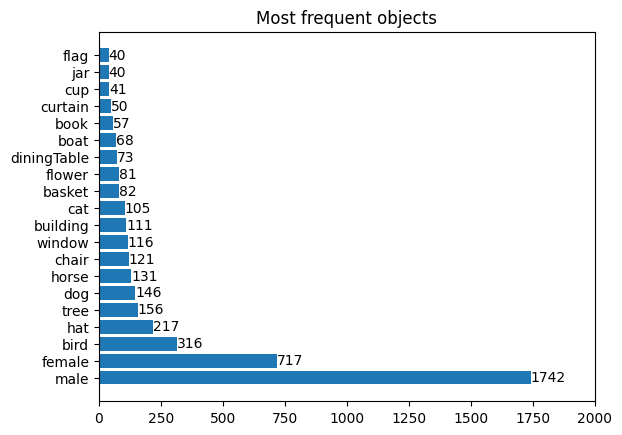

In [ ]:
x, y = [], []
for i in range(20):
    key = list(sorted_dict.keys())[i]
    x.append(sorted_dict[key])
    y.append(key)
fig, ax = plt.subplots()
bars = ax.barh(y, x)
ax.bar_label(bars)
plt.xlim([0,2000])
plt.title("Most frequent objects")
plt.show()

### Plot n x n images

The show what the Ot & Sien ++ dataset consists of nine random images are shown.

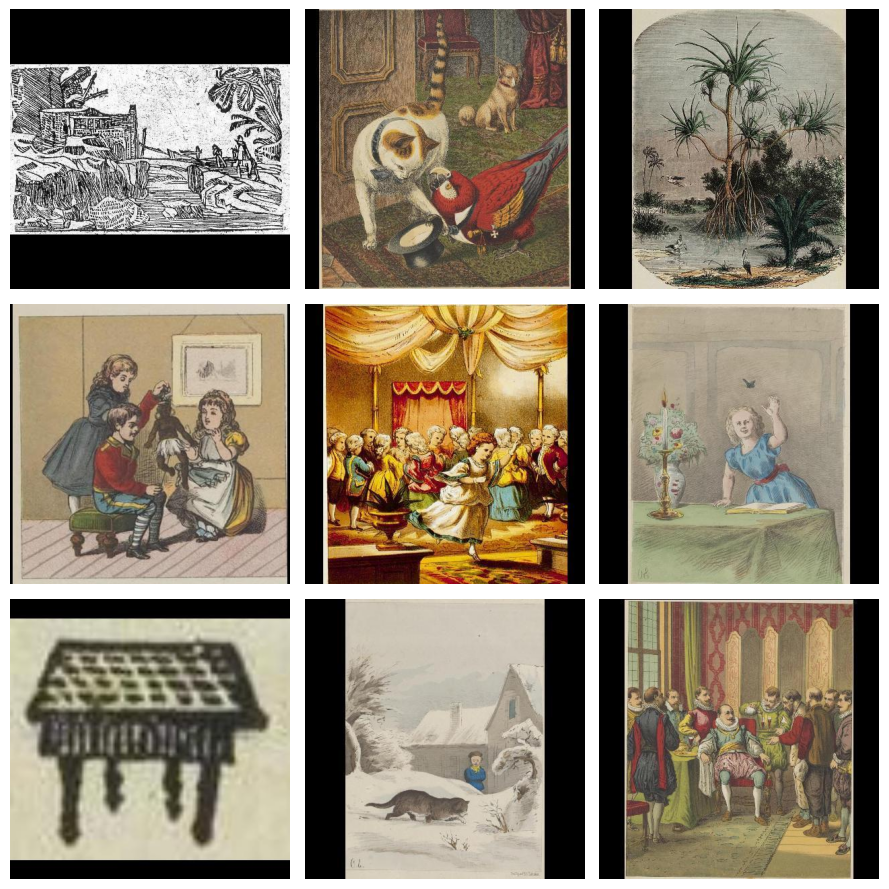

In [ ]:
import numpy as np

n = 3

fig, axs = plt.subplots(n, n, figsize=(n ** 2, n ** 2))
for i in range(n ** 2):

    img = cv2.imread(os.path.join(directory_images, files_images[i]))
    ax = axs[i // n][i % n]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.axis('off')

plt.tight_layout()
plt.show()